In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
def pam4(N, A):
    data = np.random.choice([-(A), -(A/3), (A/3), (A)], N)
    return data

In [ ]:
N = 1000
M = 10

m = pam4(N, 3)

mup = np.zeros(N * M)
mup[::M] = m

ps = signal.windows.hamming(2*M)

x = signal.lfilter(ps, 1, mup)

w, h = signal.freqz(ps)
magnitude_ps = abs(h)

X = np.fft.fft(x)
freqs = np.fft.fftfreq(x.size, d=1.0)/0.5
magnitude_x = np.abs(X)

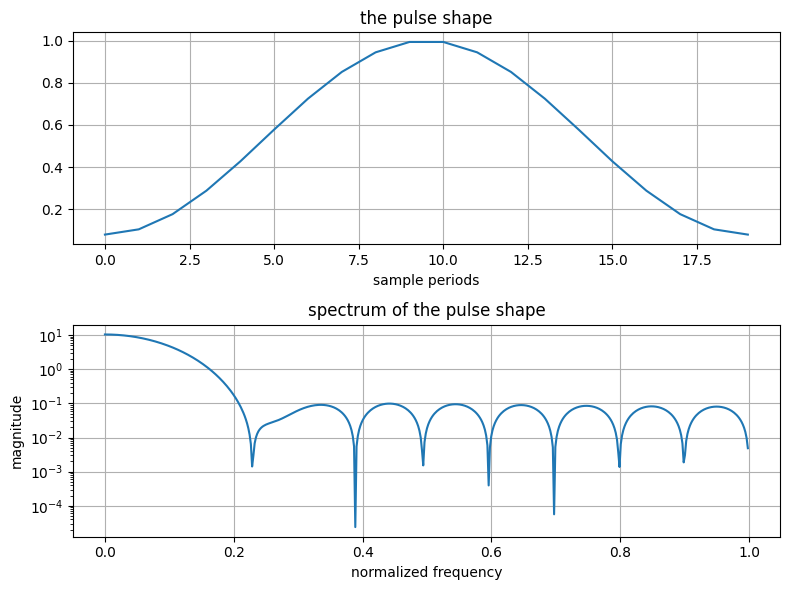

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(ps)
ax1.set_title('the pulse shape')
ax1.set_xlabel('sample periods')
ax1.grid(True)

ax2.plot(w / np.pi, magnitude_ps)
ax2.set_title('spectrum of the pulse shape')
ax2.set_xlabel('normalized frequency')
ax2.set_ylabel('magnitude')
ax2.grid(True)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

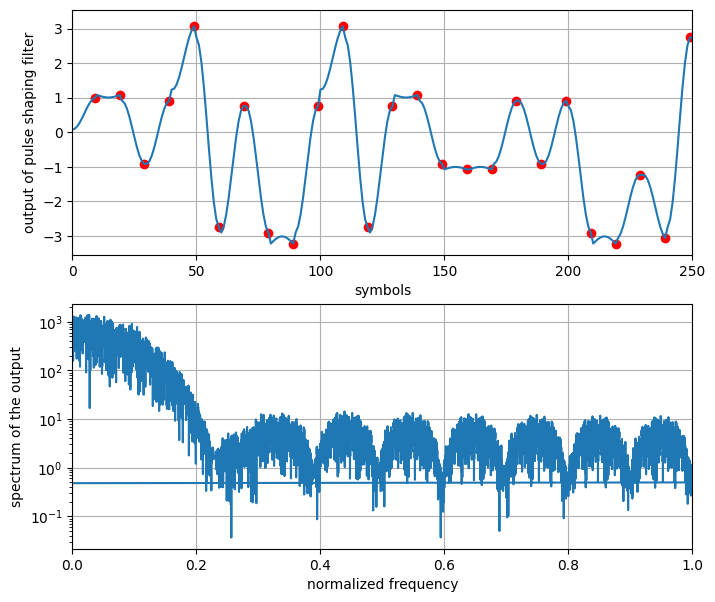

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7))

for i in range(9, 250, M):
    ax1.plot(i, x[i], 'ro')

ax1.plot(x)
ax1.set_xlim(0,250)
ax1.set_xlabel('symbols')
ax1.set_ylabel('output of pulse shaping filter')
ax1.grid(True)

ax2.semilogy(freqs, magnitude_x)
ax2.set_xlim(0,1)
#ax2.set_ylim(1e-1,1e3)
ax2.set_xlabel('normalized frequency')
ax2.set_ylabel('spectrum of the output')
ax2.grid(True)
#ax2.set_yscale('log')

plt.show()